# Exercise 0

<div class="alert alert-block alert-info">
    <b>Due Date: 14.10.2021, 15:00</b><br>
    This is the notebook for the 0-th exercise. It is meant as a kind of "warm-up" exercise, but it <b>will be graded</b>, and counts towards your total points.
</div>


## Naming Notebooks

Save the notebook under a new name, and put your name and your matriculation number (including the 'k') where the placeholders indicate. If your first name (in KUSSS!) is "Theta" and your surname is "Greekletters" and your matriculation number is "k0123456", the notebook filename should be:

"Greekletters Theta k564711 - Assignment 0.ipynb"

## Running code cells

To execute a code cell, use either `Ctrl-Enter`, `Shift-Enter`, or the GUI buttons above.

## Solving exercises

To solve an exercise, read the exercise text carefully, maybe even look for **TODO**'s in the code, and then proceed to solve. Sometimes we are asking free-form questions, and would like you to provide some textual answer.

In [1]:
# let's import some dependencies first
import numpy as np
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt

## 1. Expected Values (1 point)
Re-visit the notion of `expected value` for the finite case ([here is a good reminder](https://en.wikipedia.org/wiki/Expected_value)). Then compute the expected value of the given random variable.

In [2]:
# possible outcomes of the variable
xs = np.array([1, 2, 3, 4, 5, 6])

# probabilities of the outcomes
ps = np.ones(len(xs)) / len(xs)

print('xs', xs)
print('ps', ps)

expected_value = np.sum(xs*ps)  # TODO replace with proper computation for the expected value
print('E[X]', expected_value)

xs [1 2 3 4 5 6]
ps [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
E[X] 3.5


## 2. Simulation (1 point)
Let's simulate a few dice rolls, and compute the average over the sequence of outcomes so far, for each time step. In order to quickly simulate our dice, we will use a **pseudo random number generator**. In order to make our experiments reproducible, we will **seed** our random number generator. We have chosen a truly random number via [this page](https://www.random.org/integers/). (Fun fact: True random numbers are a [rather expensive commodity](https://en.wikipedia.org/wiki/Hardware_random_number_generator))

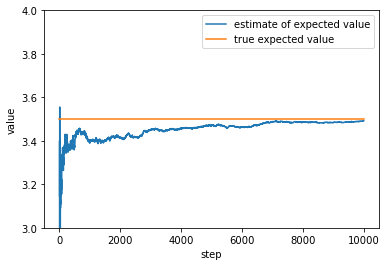

In [3]:
# a little helper function that records the estimates
def simulate(rng, n_samples):
    dice_rolls = rng.integers(
        low=1,   # lower bound
        high=7,  # higher bound (EXCLUSIVE!)
        size=n_samples  # the shape of the resulting numpy array
    )
    estimates = np.zeros(n_samples)
    for t in range(1, n_samples):
        # TODO replace next line with the computation of the current estimate

        for i in [1,2,3,4,5,6]:
            try:
                prob = len(np.where(dice_rolls[:(t-1)]==i)[0])/ len(dice_rolls[:(t-1)])
            except: # for the first observation
                prob = len(np.where(dice_rolls[:(t-1)]==i)[0])
            estimates[t] += i * prob
    return estimates

# let's seed our PRNG
rng = np.random.default_rng(7226801)

# let's simulate!
estimates = simulate(rng, 10000)
fig, ax = plt.subplots()
ax.plot(estimates, label='estimate of expected value')

# let's indicate where the true expected value lies
ax.plot(
    [0, len(estimates)],
    [3.5, 3.5],
    label='true expected value'
)

# always label your axes!
ax.set_xlabel('step')
ax.set_ylabel('value')

# let's zoom in on the y-axis
ax.set_ylim([3, 4])
ax.legend()
plt.show()

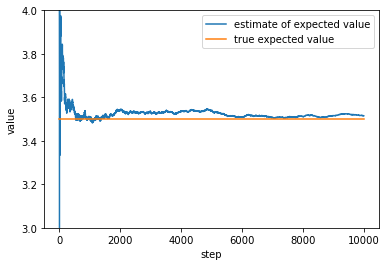

In [4]:
# if we change the PRNG seed, we get different estimates
# let's seed our PRNG
rng = np.random.default_rng(1234)

# let's simulate!
estimates = simulate(rng, 10000)
fig, ax = plt.subplots()
ax.plot(estimates, label='estimate of expected value')

# let's indicate where the true expected value lies
ax.plot(
    [0, len(estimates)],
    [3.5, 3.5],
    label='true expected value'
)

# always label your axes!
ax.set_xlabel('step')
ax.set_ylabel('value')

# let's zoom in on the y-axis
ax.set_ylim([3, 4])
ax.legend()
plt.show()

## 3. Computing Returns (1 point)
Later on in this course, when we will do **value estimation** for our reinforcement learning agents, we will need to compute **returns**. Given a particular **path through state space** of length $T$ ($s_1, r_1, a_2, s_2, r_2, a_3, \dots, a_T, s_T, r_T$), there is a **sequence of rewards** ($r_1, r_2, r_3, \dots, r_T$) associated with it. Together with the so called **discount factor**  or **discount rate** $\gamma$, this sequence of rewards will allow us to compute the **return**.

Given a sequence of rewards: ($r_1, r_2, r_3, \dots, r_T$) and $\gamma = 0.9$

Find **all the returns** as defined: $G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \dots = \sum_{k=0}^{T-t-1} \gamma^k r_{t+k+1}$

What this means is that you should find the returns $G_1, G_2, G_3, \dots, G_T$

In [5]:
rng = np.random.default_rng(89608946)
T = 5
gamma = 0.9
rewards = rng.normal(loc=0, scale=1, size=T)

returns = np.zeros(T)
# first, we'll implement the return computation just as stated in the above definition
for t in range(T):
    for k in range(0, T - t -1 ): 
        # TODO: replace next line with the correct return computation
        returns[t] += rewards[t+k+1]*(gamma**(k))


print('rewards', rewards)
print('returns', returns)

rewards [-1.3523  1.0468  0.5307 -0.5796 -0.646 ]
returns [ 0.584  -0.5142 -1.1609 -0.646   0.    ]


## 4. More Efficient Return Computation (1 point)
After staring at the return definition $G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \gamma^3 r_{t+4} + \dots$ for a while, we might notice a particular recursive pattern.

As it turns out, this pattern, this recursive relationship among returns, is very helpful:

$G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \gamma^3 r_{t+4} + \dots$

$G_t = r_{t+1} + \gamma (r_{t+2} + \gamma r_{t+3} + \gamma^2 r_{t+4} + \dots)$

$G_t = r_{t+1} + \gamma G_{t+1}$

This works for all time steps $t < T$, if we choose to define $G_T = 0$. Given a sequence of rewards, we can then compute all the returns in the reverse order, without having to compute many intermediate results multiple times! This might be a bit tricky to do, given the array indices in numpy start with $0$, but we're confident you'll manage!


Hint: Make $t$ go downwards from $T - 1$ to $1$, and notice that $G_{t-1} = r_t + \gamma G_t$

In [6]:
returns = np.zeros(T)

# TODO: write down a more efficient return computation

index = len(rewards)-1
for reward in reversed(rewards):
    if index == len(rewards)-1:
        returns[index] = 0
    else:
        returns[index] = rewards[index+1] + gamma * returns[index+1]
    index -= 1
        
print('rewards', rewards)
print('returns', returns)


rewards [-1.3523  1.0468  0.5307 -0.5796 -0.646 ]
returns [ 0.584  -0.5142 -1.1609 -0.646   0.    ]


## 5. OpenAI Gym (1 point)
We will use the [OpenAI Gym](https://gym.openai.com) library extensively in our exercises. We will explore the interface to gym-environments , in particular we'll look at one of the [toy_text](https://gym.openai.com/envs/#toy_text) environments. You don't need to write any code here, just observe what is happening after the agent selects an action, and the environment reacts.

**Question**: Is the environment deterministic or stochastic?

**Answer**: The environment is stochastic because the agent can end up in an other field than chosen to go to.

In [7]:
import gym

# this creates an environment
env = gym.make('FrozenLake-v1')
state = env.reset()

# this shows us a human readable representation of the frozen lake
# S: starting point, safe
# F: frozen surface, potentially slippery, but safe
# H: hole, fall to your doom
# G: goal
# the red square is the agent's position in the world
env.render()


SFFF
FHFH
FFFH
HFFG


In [8]:
# these are the available actions
n2i = dict(
    LEFT = 0,
    DOWN = 1,
    RIGHT = 2,
    UP = 3,
)
i2n = {v:k for k, v in n2i.items()}

# the number of times we'll "live. die. repeat"
n_episodes = 10

for i_episode in range(n_episodes):
    print(f'### e:{i_episode} #########################################')
    # at the start of an episode, we reset the environment
    state = env.reset()

    # then we will call 'step' in a loop, and move randomly until we either:
    # - reach the goal
    # - or fall into a hole

    done = False
    while not done:
        random_action = rng.integers(0, 4)
        print('action:', i2n[random_action])
        state, reward, done, info = env.step(random_action)
        print('state:', state)
        print('reward:', reward)
        # print('done', done)
        # print('info', info)  # we will ignore what's in here!
        env.render()  # this will also display the last action that led to this state
    print('# episode is done')

### e:0 #########################################
action: RIGHT
state: 1
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: UP
state: 0
reward: 0.0
  (Up)
SFFF
FHFH
FFFH
HFFG
action: RIGHT
state: 4
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: DOWN
state: 8
reward: 0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
action: LEFT
state: 8
reward: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
action: RIGHT
state: 9
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: RIGHT
state: 13
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: RIGHT
state: 9
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: RIGHT
state: 10
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: LEFT
state: 6
reward: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
action: UP
state: 7
reward: 0.0
  (Up)
SFFF
FHFH
FFFH
HFFG
# episode is done
### e:1 #########################################
action: LEFT
state: 0
reward: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
action: RIGHT
state: 0
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: LEFT
state: 0
reward: 0.0
  (Left)
SFFF
FHFH
FF